# Project: Wrangling and Analyze Data



## Data Gathering 


In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
import requests
import os
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import json
import re
from IPython.display import Image
import matplotlib.pyplot as plt

In [5]:
# twitter_archive_enhanced.csv was saved in the same folder as notebook.  Opening with pd.read_csv
twitterAE = pd.read_csv('twitter-archive-enhanced.csv')
twitterAE.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
# image_predictions.tsv from Link provided
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
filename = url.split('/')[-1]
with open (os.path.join(filename), mode = 'wb') as file:
    file.write(response.content)
    
imageP = pd.read_csv(filename, sep='\t')
imageP.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

# <font color = RED style = BOLD>  Twitter will not work unless basic plan purchased. Add Screen Shots.  

In [7]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)
filename = url.split('/')[-1]
with open (os.path.join(filename), mode = 'wb') as file:
    file.write(response.content)

tweet_line=[]
with open(filename, 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_line.append(tweet)

tweetJson = pd.DataFrame(tweet_line, columns=list(tweet_line[0].keys()))
tweetJson = tweetJson[['id', 'retweet_count', 'favorite_count']]
tweetJson = tweetJson.rename(columns={'id':'tweet_id'})
tweetJson.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
twitterAE.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1382,700864154249383937,NaN,NaN,2016-02-20 02:06:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Pupper is a present to world. Here is a bow f...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/700864154...,12,10,a,NaN,NaN,pupper,NaN
915,757354760399941633,NaN,NaN,2016-07-24 23:20:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Devón (pronounced ""Eric""). He forgot h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/757354760...,8,10,Devón,NaN,NaN,NaN,NaN
1773,678255464182861824,NaN,NaN,2015-12-19 16:47:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessifer. She is a Bismoth Teriyaki. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678255464...,9,10,Jessifer,NaN,NaN,NaN,NaN
773,776249906839351296,NaN,NaN,2016-09-15 02:42:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. Pls stop sen...,7.007478e+17,4.196984e+09,2016-02-19 18:24:26 +0000,https://twitter.com/dog_rates/status/700747788...,11,10,very,NaN,NaN,NaN,NaN
843,766714921925144576,7.667118e+17,4.196984e+09,2016-08-19 19:14:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",His name is Charley and he already has a new s...,NaN,NaN,NaN,NaN,13,10,NaN,NaN,NaN,NaN,NaN
216,850753642995093505,NaN,NaN,2017-04-08 16:54:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Kyle. He made a joke about your shoes,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/850753642...,11,10,Kyle,NaN,NaN,NaN,NaN
1548,689275259254616065,NaN,NaN,2016-01-19 02:36:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lucky. He was showing his friends an extr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689275259...,10,10,Lucky,NaN,NaN,NaN,NaN
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
671,789960241177853952,NaN,NaN,2016-10-22 22:42:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Buddy. His father was a...,7.624645e+17,4.196984e+09,2016-08-08 01:44:46 +0000,https://twitter.com/dog_rates/status/762464539...,12,10,Buddy,NaN,NaN,NaN,NaN
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,NaN,NaN,NaN,NaN,NaN


In [10]:
twitterAE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [11]:
twitterAE.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
twitterAE.tweet_id.duplicated().sum()

0

In [13]:
imageP.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
imageP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
imageP.tweet_id.duplicated().sum()

0

In [16]:
tweetJson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [17]:
tweetJson.tweet_id.duplicated().sum()

0

### Quality issues
1. `imageP`: Identify probability of "Not a dog" or Breed of dog based on P1, P2, and P3 column values

2. `imageP`: Format Breed names properly (Caplitalize and spaces not "_")

3. `imageP`: Remove unneeded columns

4. `twitterAE`: Single out the original tweets vs retweets 

5. `twitterAE`: Review texta bout dogs to identify other "Not a dog" or "we rate dogs" to remove other "not a dog" row. 

6. `twitterAE`: Per notes, denominators should almost always be a 10. Review.

7. `twitterAE`: Review extreme outliners of numerators. Review.

8. `twitterAE`: Review dog names ie: "a", "an", "not", "just", "mad" and others.

### Tidiness issues
1. `twitterAE`: Combine Dogtionary columns into 1

2. `twitterAE`: Combine 3 dataframes into 1.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [289]:
# Make copies of original pieces of data
twitterAECopy = twitterAE.copy()
imagePCopy = imageP.copy()
tweetJsonCopy = tweetJson.copy()

### Issue #1: `imageP`: Identify probability of "Not a dog" or Breed of dog based on P1, P2, and P3 columns.
### Issue #2: `imageP`: Format Breed names properly (Caplitalize and spaces not "_")
### Issue #3: `imageP`: Remove unneeded columns  

######  Define:  Cleaning up `imageP` copy, to identify the most likely breed for each dog.  
###### While running the function, I'll also properly address the caplilization and space formatting before appending to the list (which will be added back as  a column on the DataFrame).  
###### Finally, I'll remove all the unneeded columns. I'm addressing all 3 of these in one issues as it will limit the amount of times reviewing the same information. 

In [290]:
imagePCopy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [291]:
imagePCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [292]:
imagePCopy.columns.tolist()

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

###### Code

In [293]:
Breed = []
Conf_level = []

def findBreed(imagePCopy):
    if imagePCopy.p1_dog == True:
        Breed.append(imagePCopy.p1.replace('_', ' ').title())
        Conf_level.append(imagePCopy.p1_conf)
    elif imagePCopy.p2_dog == True:
        Breed.append(imagePCopy.p2.replace('_', ' ').title())
        Conf_level.append(imagePCopy.p2_conf)
    elif imagePCopy.p3_dog == True:
        Breed.append(imagePCopy.p3.replace('_', ' ').title())
        Conf_level.append(imagePCopy.p3_conf)
    elif imagePCopy.p1_dog == False and imagePCopy.p2_dog == False and imagePCopy.p3_dog == False:
        Breed.append('Not a Dog')
        Conf_level.append(1)
    else:
        Breed.append('Unknown Breed')
        Conf_level.append(np.NaN)
        
imagePCopy.apply(findBreed, axis=1)

imagePCopy['Breed'] = Breed
imagePCopy['Conf_level'] = Conf_level


imagePCopy = imagePCopy.drop(columns={'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'})

###### Test

In [294]:
imagePCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   Breed       2075 non-null   object 
 3   Conf_level  2075 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


### Issue #3:  `twitterAE`: Single out the original tweets vs retweets 

###### Define:  Files contain both the original and retweets of the original Tweet. I'll only utilize the original data and will drop the retweets.  When joining Dataframes later, the `twittterAE` files will be the original lists.

In [295]:
twitterAECopy.count()

tweet_id                      2356
in_reply_to_status_id         78  
in_reply_to_user_id           78  
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id           181 
retweeted_status_user_id      181 
retweeted_status_timestamp    181 
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          1611
doggo                         97  
floofer                       10  
pupper                        257 
puppo                         30  
dtype: int64

###### Code

In [296]:
#This will query for retweeted_status_user_id with "NaN". Meaning, these were not retweeted.
twitterAECopy = twitterAECopy.query('retweeted_status_user_id != retweeted_status_user_id')
twitterAECopy = twitterAECopy.query('in_reply_to_status_id != in_reply_to_status_id')

###### Test

In [297]:
twitterAECopy.count()

tweet_id                      2097
in_reply_to_status_id         0   
in_reply_to_user_id           0   
timestamp                     2097
source                        2097
text                          2097
retweeted_status_id           0   
retweeted_status_user_id      0   
retweeted_status_timestamp    0   
expanded_urls                 2094
rating_numerator              2097
rating_denominator            2097
name                          1494
doggo                         83  
floofer                       10  
pupper                        230 
puppo                         24  
dtype: int64

In [298]:
twitterAECopy.retweeted_status_user_id.unique()

array([nan])

In [299]:
twitterAECopy.in_reply_to_status_id.unique()

array([nan])

### Issue #4: `twitterAE`: Remove unneeded columns.

###### Define:  Now that the following columns are all "NaN", drop them.  The 'source' column doesn't give much useful information, I'll drop that. The 'expanded_urls' column is a list of picture URLs. Since the main photo reviewed for detail will be in the `imageP` file and I'm not going to explode this column, I'll drop this also.

In [300]:
twitterAECopy.columns.tolist()

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

###### Code

In [301]:
twitterAECopy = twitterAECopy.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source', 'expanded_urls'])

###### Test

In [302]:
twitterAECopy.columns.tolist()

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [303]:
imagePCopy.head()

,tweet_id,jpg_url,Breed,Conf_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311


### Issue #5: `twitterAE`: Review text about dogs to identify other "Not a Dog" or "We only rate dogs" 

###### Define: Through reviews, I noticed a lot of text stating, "This is not a dog" or "We only rate dogs".  During the review, I was going to remove all these as they are not a dog.  My first time through I did similar as below. But noticed 2 had highly confident dog breeds.  In reviewing the photo, I realized it was, infact, a dog. I reviewed the least confident breed, 0.003, this is also a photo of a dog.  Therefore, the below I made a 2nd copy of the ImagePCopy to show I have reviewed these and did not remove them.

In [304]:
imageEXAMPLE = imagePCopy.copy()
imageEXAMPLE

,tweet_id,jpg_url,Breed,Conf_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311
...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador Retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581


###### Code

In [305]:
NotDog = twitterAECopy.loc[twitterAECopy.text.str.contains('we only rate dogs')]['tweet_id']
NotDog = NotDog._append(twitterAECopy.loc[twitterAECopy.text.str.contains('only send dogs')]['tweet_id'])

for tweet_id in NotDog:
    try:
        imageEXAMPLE.loc[imageEXAMPLE.tweet_id == tweet_id, 'Breed'] = "Not a Dog"
    except ValueError:
        print("{} not found in imagePCopy".format(tweet_id))    

###### Test

In [306]:
imageEXAMPLE = imageEXAMPLE[imageEXAMPLE.tweet_id.isin(NotDog)]
twitterAEExample = twitterAECopy[['tweet_id', 'text']]
imageEXAMPLE = imageEXAMPLE.merge(twitterAEExample, left_on='tweet_id', right_on='tweet_id', how='left')

In [307]:
imageEXAMPLE

,tweet_id,jpg_url,Breed,Conf_level,text
0,677895101218201600,https://pbs.twimg.com/media/CWhd_7WWsAAaqWG.jpg,Not a Dog,0.550702,Guys this was terrifying. Really spooked me up. We don't rate ghosts. We rate dogs. Please only send dogs... 9/10 https://t.co/EJImi1udYb
1,680055455951884288,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,Not a Dog,0.995466,"Meet Sammy. At first I was like ""that's a snowflake. we only rate dogs,"" but he would've melted by now, so 10/10 https://t.co/MQfPK4zwuh"
2,681297372102656000,https://pbs.twimg.com/media/CXR0WJ_W8AMd_O8.jpg,Not a Dog,0.482401,This is actually a lion. We only rate dogs. For the last time please only send dogs. Thank u.\n12/10 would still pet https://t.co/Pp26dMQxap
3,685532292383666176,https://pbs.twimg.com/media/CYN_-6iW8AQhPu2.jpg,Not a Dog,0.095805,"For the last time, WE. DO. NOT. RATE. BULBASAUR. We only rate dogs. Please only send dogs. Thank you ...9/10 https://t.co/GboDG8WhJG"
4,714141408463036416,https://pbs.twimg.com/media/Cekj0qwXEAAHcS6.jpg,Not a Dog,0.586951,"I know we only rate dogs, but since it's Easter I guess we could rate a bunny for a change. 10/10 petable as hell https://t.co/O2RlKXigHu"
5,738184450748633089,https://pbs.twimg.com/media/Cj6O1G9UYAAIU-1.jpg,Not a Dog,0.289471,"For the last time, we only rate dogs. Pls stop sending other animals like this Duck-Billed Platypus. Thank you. 9/10 https://t.co/twxYcPOafl"
6,747461612269887489,https://pbs.twimg.com/media/Cl-EXHSWkAE2IN2.jpg,Not a Dog,1.000000,Never seen a shark hold another shark like this before. Must be evolving. Both 10/10 please only send dogs though https://t.co/x4IUNKV79Y
7,761745352076779520,https://pbs.twimg.com/media/CpJDWqhW8AAFt45.jpg,Not a Dog,1.000000,Guys.. we only rate dogs. Pls don't send any more pics of the Loch Ness Monster. Only send in dogs. Thank you. 11/10 https://t.co/obH5vMbm1j
8,772581559778025472,https://pbs.twimg.com/media/CrjC0JAWAAAjz6n.jpg,Not a Dog,0.574345,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
9,781524693396357120,https://pbs.twimg.com/media/CtiIj0AWcAEBDvw.jpg,Not a Dog,0.003523,Idk why this keeps happening. We only rate dogs. Not Bangladeshi Couch Chipmunks. Please only send dogs... 12/10 https://t.co/ya7bviQUUf


In [308]:
imagelist = imageEXAMPLE.jpg_url.tolist()

##Below was found on https://mindtrove.info/
from IPython.display import HTML, Image

def _src_from_data(data):
    """Base64 encodes image bytes for inclusion in an HTML img element"""
    img_obj = Image(data=data)
    for bundle in img_obj._repr_mimebundle_():
        for mimetype, b64value in bundle.items():
            if mimetype.startswith('image/'):
                return f'data:{mimetype};base64,{b64value}'

def gallery(images, row_height='auto'):
    """Shows a set of images in a gallery that flexes with the width of the notebook.
    
    Parameters
    ----------
    images: list of str or bytes
        URLs or bytes of images to display

    row_height: str
        CSS height value to assign to all images. Set to 'auto' by default to show images
        with their native dimensions. Set to a value like '250px' to make all rows
        in the gallery equal height.
    """
    figures = []
    for image in images:
        if isinstance(image, bytes):
            src = _src_from_data(image)
            caption = ''
        else:
            src = image
            caption = f'<figcaption style="font-size: 0.6em">{image}</figcaption>'
        figures.append(f'''
            <figure style="margin: 5px !important;">
              <img src="{src}" style="height: {row_height}">
              {caption}
            </figure>
        ''')
    return HTML(data=f'''
        <div style="display: flex; flex-flow: row wrap; text-align: center;">
        {''.join(figures)}
        </div>
    ''')
    
gallery(imagelist, row_height='150px')

### Issue #6: `twitterAE`: Per notes, denominators should almost always be 10. Review.

###### Define: Query for rating denominators that are not 10.  Review the text for these and adjust the numerator & denominator accordingly. 

In [309]:
# Create new dataframe with selected columns
reviewRating = twitterAECopy[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

reviewDenominator = reviewRating.query('rating_denominator != 10')

pd.set_option('display.max_colwidth', 0)

reviewDenominator

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


###### Code

In [310]:
dropList = []
#7 floofs
twitterAECopy.loc[twitterAECopy.tweet_id == 820690176645140481, 'rating_numerator'] = 12

#no rating ... Drop
dropList.append(810984652412424192)

#15 dogs
twitterAECopy.loc[twitterAECopy.tweet_id == 758467244762497024, 'rating_numerator'] = 11

#wrong / retrived
twitterAECopy.loc[twitterAECopy.tweet_id == 740373189193256964, 'rating_numerator'] = 14

#Aquad of dogs - 17
twitterAECopy.loc[twitterAECopy.tweet_id == 731156023742988288, 'rating_numerator'] = 12

#wrong / retrived
twitterAECopy.loc[twitterAECopy.tweet_id == 722974582966214656, 'rating_numerator'] = 13

#wrong / retrieved
twitterAECopy.loc[twitterAECopy.tweet_id == 716439118184652801, 'rating_numerator'] = 11

#9 puppers
twitterAECopy.loc[twitterAECopy.tweet_id == 713900603437621249, 'rating_numerator'] = 11

#8 puppers
twitterAECopy.loc[twitterAECopy.tweet_id == 710658690886586372, 'rating_numerator'] = 10

#5 dogs
twitterAECopy.loc[twitterAECopy.tweet_id == 709198395643068416, 'rating_numerator'] = 9

#flock of puppers
twitterAECopy.loc[twitterAECopy.tweet_id == 704054845121142784, 'rating_numerator'] = 12

#4 puppies
twitterAECopy.loc[twitterAECopy.tweet_id == 697463031882764288, 'rating_numerator'] = 11

#lots of puppers
twitterAECopy.loc[twitterAECopy.tweet_id == 684222868335505415, 'rating_numerator'] = 11

#wrong / retrived
twitterAECopy.loc[twitterAECopy.tweet_id == 682962037429899265, 'rating_numerator'] = 10

#PUPPERGEDDEN 
twitterAECopy.loc[twitterAECopy.tweet_id == 677716515794329600, 'rating_numerator'] = 12

#platoon of puppers
twitterAECopy.loc[twitterAECopy.tweet_id == 675853064436391936, 'rating_numerator'] = 11

#wrong / retrived
twitterAECopy.loc[twitterAECopy.tweet_id == 666287406224695296, 'rating_numerator'] = 9

for tweet_id in reviewDenominator.tweet_id:
    twitterAECopy.loc[twitterAECopy.tweet_id == tweet_id, 'rating_denominator'] = 10
    
#Use DropDogs list to drop rows from twitterAE DF.     
twitterAECopy = twitterAECopy[~twitterAECopy.tweet_id.isin(dropList)]

###### Test

In [311]:
twitterAECopy.query('rating_denominator != 10')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #7:  `twitterAE`: Review extreme ouliners of numerators.

###### Define: Similar to the rating denominator review, review for numerators and adjust accordingly.  

In [312]:
# Create new dataframe with selected columns
reviewRating = twitterAECopy[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

reviewNumerator = reviewRating.query('rating_numerator > 15 or rating_numerator < 4')

pd.set_option('display.max_colwidth', 0)

reviewNumerator

,tweet_id,text,rating_numerator,rating_denominator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
765,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3,10
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1189,718246886998687744,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3,10
1249,711306686208872448,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,3,10
1314,706901761596989440,This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu,3,10
1406,699088579889332224,This is Charl. He's a bully. Chucks that dumbbell around like its nothing. Sharp neck. Exceptionally unfluffy. 3/10 https://t.co/VfLoDZecJ7,3,10
1478,693590843962331137,Meet Phil. He's big af. Currently destroying this nice family home. Completely uncalled for. 3/10 not a good pupper https://t.co/fShNNhBWYx,3,10


In [313]:
reviewNumerator.shape

(38, 4)

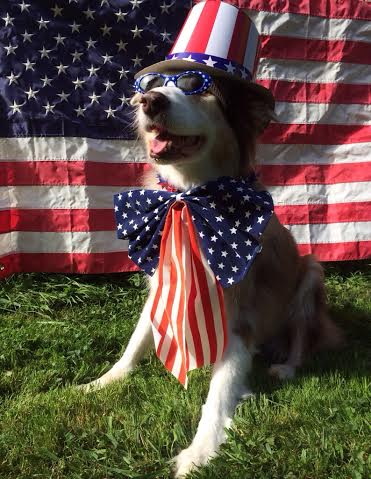

In [314]:
#rated 1776

jpg = imagePCopy.query("tweet_id == 749981277374128128")['jpg_url']
jpg = jpg.to_string(index=False)
Image(jpg, width=400)


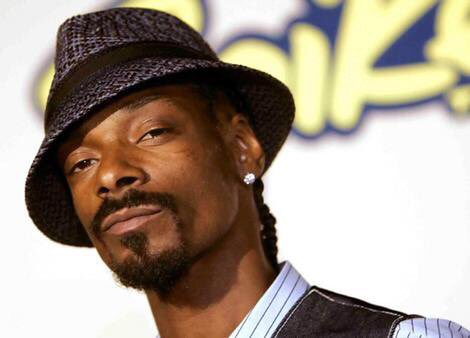

In [315]:
#rated 420

jpg = imagePCopy.query("tweet_id == 670842764863651840")['jpg_url']
jpg = jpg.to_string(index=False)
Image(jpg, width=400)

###### Code

In [316]:
#all dogs other ratings are int. Rounded.
twitterAECopy.loc[twitterAECopy.tweet_id == 786709082849828864, 'rating_numerator'] = 10

#all dogs other ratings are int. Rounded.
twitterAECopy.loc[twitterAECopy.tweet_id == 778027034220126208, 'rating_numerator'] = 11

#all dogs other ratings are int. Rounded.
twitterAECopy.loc[twitterAECopy.tweet_id == 680494726643068929, 'rating_numerator'] = 11

###### Test

In [317]:
twitterAECopy.query('rating_numerator > 15 or rating_numerator < 4').shape

(35, 10)

### Issue #8:  `twitterAE`: Review dog names

###### Define:  Some dog names were not pulled in correctly or missed.  "a", "not", "just", "my", "incredibly" are probably not dog names. I'm going to first set these to np.NaN, then I'm going to query for all names as not names, and search the text for "named" and create this as a new Dataframe.  Then I'll update the original twitterAE copy dataframe with the newly found names.

In [318]:
twitterAECopy.shape

(2096, 10)

In [319]:
#Check out this guy's Name
twitterAECopy.query('tweet_id == 671743150407421952')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2034,671743150407421952,2015-12-01 17:30:22 +0000,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,11,10,a,NaN,NaN,NaN,NaN


###### Code

In [320]:
#Per suggestion of original project review:
mask = twitterAECopy.name.str.islower().fillna(False)

In [321]:
mask.unique()

array([False,  True])

In [322]:
column_name = 'name' 
twitterAECopy.loc[mask, column_name] = np.nan

###### Test

In [323]:
#make sure they were updated. None found.
twitterAECopy.query('name == "a" or name == "an" or name == "my" or name == "not" or name == "just" or name == "mad" or name == "incredibly" or name == "unacceptable" or name == "infuriating"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [324]:
twitterAECopy.shape

(2096, 10)

In [325]:
#Verify this guy's name is NaN, but text refers to "named"
twitterAECopy.query('tweet_id == 671743150407421952')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2034,671743150407421952,2015-12-01 17:30:22 +0000,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,11,10,NaN,NaN,NaN,NaN,NaN


###### Code

In [326]:
NameReview = twitterAECopy.query('name != name')
NameReview = NameReview[NameReview.text.str.contains('named')]
NameReview.shape

(23, 10)

In [327]:
name = []
word = 'named'
for text in NameReview.text:
    res = text.split(" ")
    lac = res.index(word) + 1
    upname = res[lac]
    if "." in upname:
        upname =  upname[:-1]
    name.append(upname)
NameReview['name'] = name

###### Test

In [328]:
twitterAECopy.update(NameReview)
twitterAECopy.shape

(2096, 10)

In [329]:
#This guy now has a name!
twitterAECopy.query('tweet_id == 671743150407421952')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2034,671743150407421952,2015-12-01 17:30:22 +0000,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,11,10,Jacob,NaN,NaN,NaN,NaN


In [330]:
twitterAECopy.name.value_counts()

name
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny         9 
             .. 
Fido          1 
Emma          1 
Spencer       1 
Lilli         1 
Christoper    1 
Name: count, Length: 948, dtype: int64

In [331]:
#during this review, I noticed "O"
twitterAECopy.name.sort_values().unique()

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfonso', 'Alfredo', 'Alfy',
       'Alice', 'Alphred', 'Amber', 'Ambrose', 'Amy', 'Amélie', 'Anakin',
       'Andru', 'Andy', 'Angel', 'Anna', 'Anthony', 'Antony', 'Apollo',
       'Aqua', 'Archie', 'Arlen', 'Arlo', 'Arnie', 'Arnold', 'Arya',
       'Ash', 'Asher', 'Ashleigh', 'Aspen', 'Astrid', 'Atlas', 'Atticus',
       'Aubie', 'Augie', 'Autumn', 'Ava', 'Axel', 'Bailey', 'Baloo',
       'Balto', 'Banditt', 'Banjo', 'Barclay', 'Barney', 'Baron', 'Barry',
       'Batdog', 'Bauer', 'Baxter', 'Bayley', 'BeBe', 'Bear', 'Beau',
       'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella', 'Belle', 'Ben',
       'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb', 'Berkeley',
       'Bernie', 'Bert', 'Berta', 'Bertson', 'Betty', 'Beya', 'Biden',
       'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick', 'Blakely',
       'Blan

In [332]:
#So I queryed and updated.
twitterAECopy.query('name=="O"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218048,2016-09-14 23:30:38 +0000,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,10,10,O,NaN,NaN,NaN,NaN


In [333]:
twitterAECopy.loc[twitterAECopy.tweet_id == 776201521193218048, 'name'] = "O'Malley"

### Issue #9:  Update the Timestamp column to remove +0000

###### Define:  Just to make it look more uniform, remove the +0000 on the timestamp.

In [334]:
twitterAECopy['timestamp'] 

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2096, dtype: object

In [335]:
twitterAECopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2096 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2096 non-null   int64 
 1   timestamp           2096 non-null   object
 2   text                2096 non-null   object
 3   rating_numerator    2096 non-null   int64 
 4   rating_denominator  2096 non-null   int64 
 5   name                1412 non-null   object
 6   doggo               83 non-null     object
 7   floofer             10 non-null     object
 8   pupper              230 non-null    object
 9   puppo               24 non-null     object
dtypes: int64(3), object(7)
memory usage: 180.1+ KB


###### Code

In [336]:
twitterAECopy['timestamp'] = pd.to_datetime(twitterAECopy['timestamp']).dt.tz_convert(None)

###### Test

In [337]:
twitterAECopy['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2351   2015-11-16 00:24:50
2352   2015-11-16 00:04:52
2353   2015-11-15 23:21:54
2354   2015-11-15 23:05:30
2355   2015-11-15 22:32:08
Name: timestamp, Length: 2096, dtype: datetime64[ns]

### Tidiness Issue #1:  Combine Dogtionary columns to 1

###### Define:  Doggo, Floofer, Pupper, Puppo are all dogtionary terms that refer to a different status. These can be combined into 1 column and a column identifying if a dogtionary was found.

In [338]:
print(twitterAECopy.doggo.unique())
print(twitterAECopy.floofer.unique())
print(twitterAECopy.pupper.unique())
print(twitterAECopy.puppo.unique())

[nan 'doggo']
[nan 'floofer']
[nan 'pupper']
[nan 'puppo']


###### Code

In [339]:
Dogtionary = []

def findDogtionary(twitterAECopy):
    if (twitterAECopy.doggo =='doggo') and (twitterAECopy.floofer != 'floofer') and (twitterAECopy.pupper != 'pupper') and (twitterAECopy.puppo != 'puppo'):
        Dogtionary.append('doggo')
    elif twitterAECopy.doggo !='doggo' and twitterAECopy.floofer == 'floofer' and twitterAECopy.pupper != 'pupper' and twitterAECopy.puppo != 'puppo':
        Dogtionary.append('floofer')
    elif twitterAECopy.doggo !='doggo' and twitterAECopy.floofer != 'floofer' and twitterAECopy.pupper == 'pupper' and twitterAECopy.puppo != 'puppo':
        Dogtionary.append('pupper')
    elif twitterAECopy.doggo !='doggo' and twitterAECopy.floofer != 'floofer' and twitterAECopy.pupper != 'pupper' and twitterAECopy.puppo == 'puppo':
        Dogtionary.append('puppo')
    elif twitterAECopy.doggo !='doggo' and twitterAECopy.floofer != 'floofer' and twitterAECopy.pupper != 'pupper' and twitterAECopy.puppo != 'puppo':
        Dogtionary.append(None)
    else:
        Dogtionary.append('Multiple Dogtionary')
        

twitterAECopy.apply(findDogtionary, axis=1)
twitterAECopy['Dogtionary'] = Dogtionary

twitterAECopy = twitterAECopy.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

###### Test

In [340]:
twitterAECopy.columns.tolist()

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'Dogtionary']

In [341]:
twitterAECopy.Dogtionary.isnull().sum()

1760

In [342]:
twitterAECopy.Dogtionary.unique()

array([None, 'doggo', 'puppo', 'pupper', 'floofer', 'Multiple Dogtionary'],
      dtype=object)

###### Define: After running the above, I noticed there may be some missed in the reference text.  I reviewed the text again similar to how the names were searched.

In [343]:
DogtionaryReview = twitterAECopy.query('Dogtionary != Dogtionary')

In [344]:
#See a Doggo?
twitterAECopy.query('tweet_id == 876537666061221888')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,Dogtionary
83,876537666061221888,2017-06-18 20:30:39,I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,14,10,NaN,None


In [345]:
#See a pupper?
twitterAECopy.query('tweet_id == 746056683365994496')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,Dogtionary
1027,746056683365994496,2016-06-23 19:05:49,This is Arlen and Thumpelina. They are best pals. Cuddly af. 11/10 for both puppers https://t.co/VJgbgIzIHx,11,10,Arlen,None


In [346]:
#See a puppo?   
twitterAECopy.query('tweet_id == 876120275196170240')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,Dogtionary
85,876120275196170240,2017-06-17 16:52:05,"Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek",13,10,Venti,None


###### Code

In [347]:
Dogtionary = ['doggo', 'floofer', 'pupper', 'puppo']

for nickname in Dogtionary:
    DogtionaryReview = twitterAECopy.query('Dogtionary != Dogtionary')
    DogtionaryReview = DogtionaryReview[DogtionaryReview.text.str.contains(nickname)]

    tweetList = DogtionaryReview.tweet_id.tolist()
    for tweet_id in tweetList:
        twitterAECopy.loc[twitterAECopy.tweet_id == tweet_id, 'Dogtionary'] = nickname

###### Test

In [348]:
twitterAECopy.Dogtionary.isnull().sum()

1724

In [349]:
#We're now a Doggo!
twitterAECopy.query('tweet_id == 876537666061221888')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,Dogtionary
83,876537666061221888,2017-06-18 20:30:39,I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,14,10,NaN,doggo


In [350]:
#We're now a pupper!     
twitterAECopy.query('tweet_id == 746056683365994496')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,Dogtionary
1027,746056683365994496,2016-06-23 19:05:49,This is Arlen and Thumpelina. They are best pals. Cuddly af. 11/10 for both puppers https://t.co/VJgbgIzIHx,11,10,Arlen,pupper


In [351]:
#We're now a puppo!     
twitterAECopy.query('tweet_id == 876120275196170240')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,Dogtionary
85,876120275196170240,2017-06-17 16:52:05,"Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek",13,10,Venti,puppo


In [352]:
imagePCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   Breed       2075 non-null   object 
 3   Conf_level  2075 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


### Tidiness Issue #2:  Combine 3 Dataframes into 1

###### Code

In [353]:
twitter_archive_master = twitterAECopy.merge(tweetJsonCopy, on='tweet_id', how='inner')
twitter_archive_master = twitter_archive_master.merge(imagePCopy, on='tweet_id', how='inner')

###### Test

In [354]:
twitter_archive_master.shape

(1284, 12)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

###### Code

In [355]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insight 1
Of the 1284 tweets, 199 were determined to not be a dog based on the photo review & probability.

In [356]:
twitter_archive_master.shape

(1284, 12)

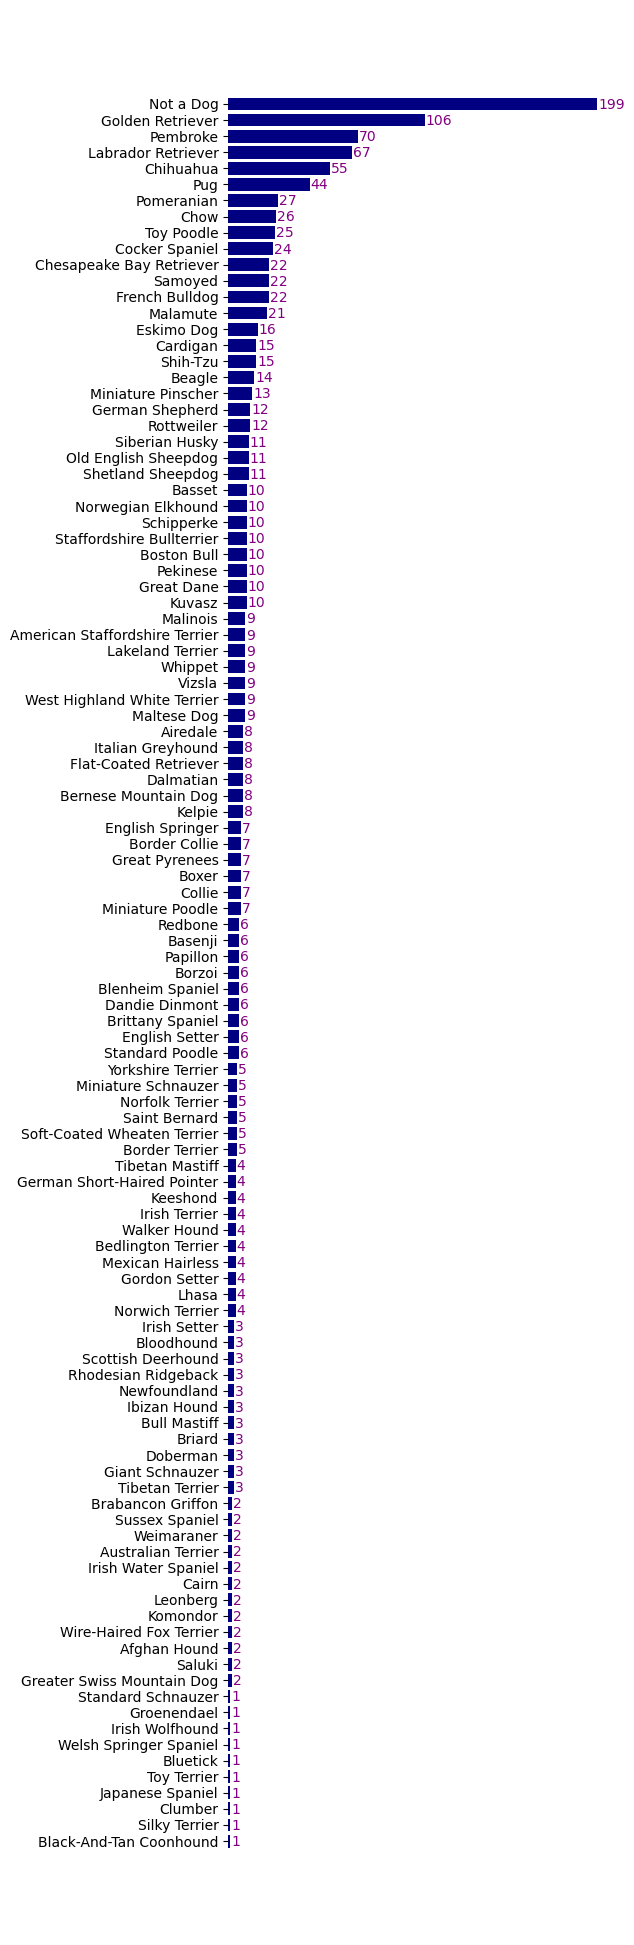

In [357]:
HorzPlot = twitter_archive_master.Breed.value_counts(ascending=True).reset_index()
Breed = HorzPlot['Breed']
Count = HorzPlot['count']

fig, ax= plt.subplots(figsize=(5,25))

ax.barh(Breed, Count, color='navy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])

for i, v in enumerate(Count):
    ax.text(v + 0.5, i-.3, str(v), color='purple')

plt.show()

The lowest average Confidence Level for a dog breed's photo is 0.000062. 
Let's take a look at this Welsh Springer Spaniel. 

In [360]:
makeList = twitter_archive_master.query('Breed != "Not a Dog"')[['Breed', 'retweet_count', 'favorite_count', 'Conf_level']]
makeList1 = makeList.groupby('Breed').mean('Conf_level').sort_values('Conf_level').reset_index()
makeList1

,Breed,retweet_count,favorite_count,Conf_level
0,Welsh Springer Spaniel,2873.000000,12127.000,0.000062
1,Groenendael,140.000000,417.000,0.054455
2,Irish Wolfhound,819.000000,1534.000,0.063078
3,Scottish Deerhound,725.666667,1989.000,0.126489
4,Toy Terrier,48.000000,129.000,0.149680
...,...,...,...,...
103,Bernese Mountain Dog,1906.750000,8134.125,0.798474
104,Keeshond,1723.500000,4914.750,0.844431
105,Clumber,1885.000000,7320.000,0.946718
106,Weimaraner,2788.000000,7380.000,0.965741


In [383]:
top5List = HorzPlot.sort_values('count', ascending=False).head(21)['Breed']
top5List = top5List[1:]
BreedConfLevel = makeList1[makeList1.Breed.isin(top5List)][['Breed', 'Conf_level']]
BreedConfLevel.sort_values('Conf_level', ascending=False)

,Breed,Conf_level
98,Pomeranian,0.721619
97,Samoyed,0.718745
95,German Shepherd,0.685812
94,French Bulldog,0.679623
92,Pembroke,0.669121
83,Pug,0.650185
81,Golden Retriever,0.639100
79,Labrador Retriever,0.605771
72,Cocker Spaniel,0.542205
67,Malamute,0.518106


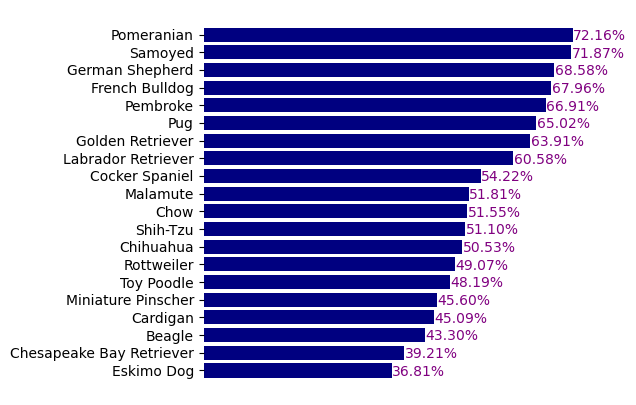

In [390]:
Breed = BreedConfLevel['Breed']
Count = BreedConfLevel['Conf_level']

fig, ax= plt.subplots(figsize=(5,5))

ax.barh(Breed, Count, color='navy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])

for i, v in enumerate(Count):
    ax.text(v + 0.001, i-.3, str(r'{0:.2%}'.format(v)), color='purple')

plt.show()

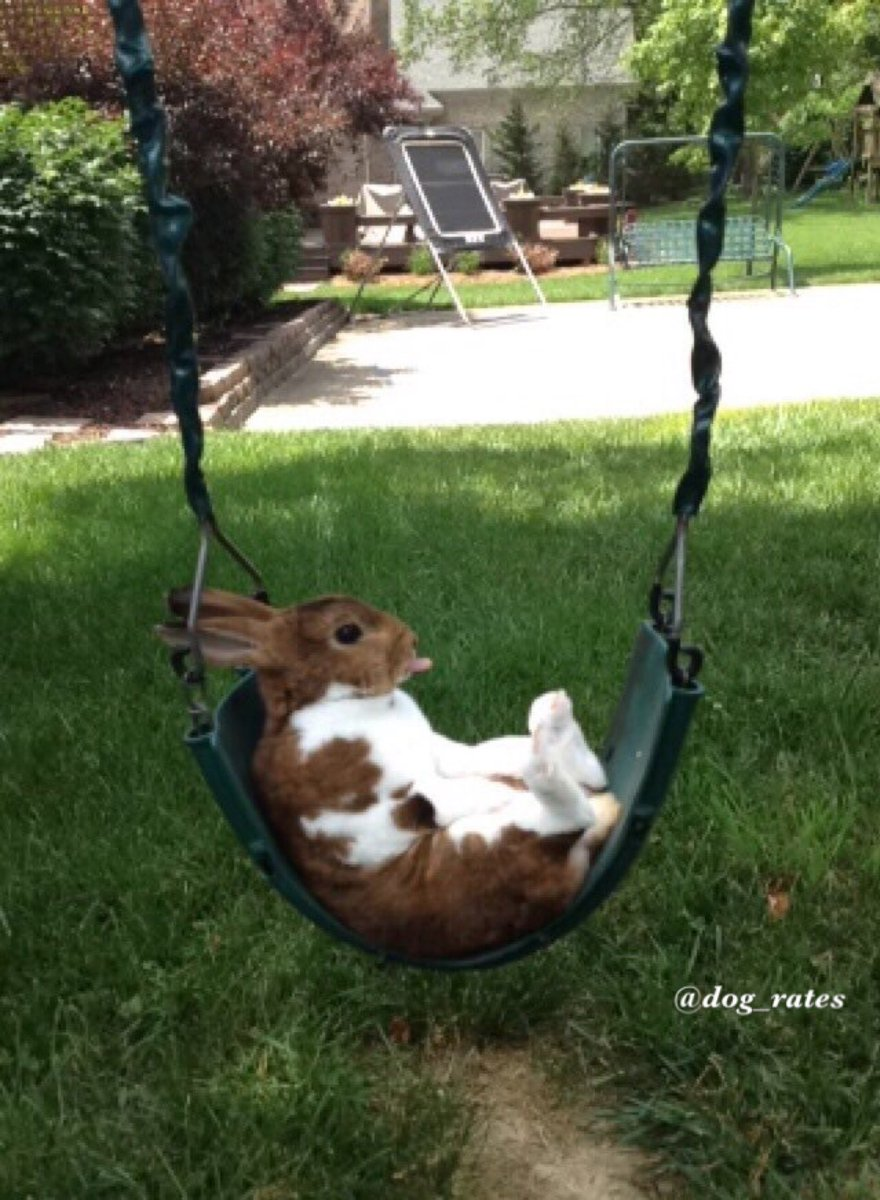

In [84]:
jpg = twitter_archive_master.query('Breed == "Welsh Springer Spaniel"')["jpg_url"]
jpg = jpg.to_string(index=False)
Image(jpg, width=400)

0.000062 being significiately lower than 0.05, maybe I should drop those... I'll look at others.

In [85]:
twitter_archive_master.query('Conf_level < .05').sort_values(by = 'rating_numerator')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,Dogtionary,retweet_count,favorite_count,jpg_url,Breed,Conf_level
998,673906403526995968,2015-12-07 16:46:21,Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10 https://t.co/t5rQHl6W8M,3,10,NaN,None,1799,3406,https://pbs.twimg.com/media/CVoySqoWUAAWb7N.jpg,Soft-Coated Wheaten Terrier,0.048928
889,678740035362037760,2015-12-21 00:53:29,Meet Tango. He's a large dog. Doesn't care much for personal space. Owner isn't very accepting. Tongue slip. 6/10 https://t.co/p2T5kGebxe,6,10,Tango,None,1926,4099,https://pbs.twimg.com/media/CWtede2WIAAF_AJ.jpg,Beagle,0.022525
871,679854723806179328,2015-12-24 02:42:51,This is Bruce. He's a rare pup. Covered in Frosted Flakes. Nifty gold teeth. Overall good dog. 7/10 would pet firmly https://t.co/RtxxACzZ8A,7,10,Bruce,None,1402,3143,https://pbs.twimg.com/media/CW9UQ7oWkAAErmU.jpg,Chow,0.002307
1080,671163268581498880,2015-11-30 03:06:07,Pack of horned dogs here. Very team-oriented bunch. All have weird laughs. Bond between them strong. 8/10 for all https://t.co/U7DQQdZ0mX,8,10,NaN,None,1198,1763,https://pbs.twimg.com/media/CVBzbWsWsAEyNMA.jpg,Scottish Deerhound,0.026983
883,679047485189439488,2015-12-21 21:15:11,This dog doesn't know how to stairs. Quite tragic really. 9/10 get it together pup https://t.co/kTpr9PTMg1,9,10,NaN,None,781,2460,https://pbs.twimg.com/media/CWx2FaLWcAEQ3vh.jpg,Golden Retriever,0.002930
1191,668297328638447616,2015-11-22 05:17:54,2 rare dogs. They waddle (v inefficient). Sometimes slide on bellies. Right one wants to be aircraft Marshall. 9/10s https://t.co/P8bivfp5sU,9,10,NaN,None,319,656,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,Eskimo Dog,0.032784
1165,668986018524233728,2015-11-24 02:54:30,This is Ruby. She's a Bimmington Fettuccini. One ear works a lil better than other. Looks startled. Cool carpet 9/10 https://t.co/j0Wpa42KCH,9,10,Ruby,None,183,578,https://pbs.twimg.com/media/CUi3PIrWoAAPvPT.jpg,Chihuahua,0.005640
1046,672205392827572224,2015-12-03 00:07:09,This is Opal. He's a Royal John Coctostan. Ready for transport. Basically indestructible. 9/10 good pupper https://t.co/yRBQF9OS7D,9,10,Opal,pupper,1270,2414,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,Pug,0.003267
1260,666644823164719104,2015-11-17 15:51:26,This is Jimothy. He is a Botwanian Gouda. Can write (impressive). Very erect tail. Still looking for hoco date. 9/10 https://t.co/LEkZjZxESQ,9,10,Jimothy,None,88,238,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,Ibizan Hound,0.044333
1280,666057090499244032,2015-11-16 00:55:59,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,9,10,NaN,None,146,304,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Golden Retriever,0.007959


It seems most under a 10 rating, with the below 0.05 Confidence level are NOT dogs. HOwever, many 10 & above are dogs. 

### Insight 2
In hopes of a name being mentioned will help identify if the photo is infact a dog or not, here's how the percents layout. 7.08% of the photos do not have a name and are listed as Not a dog, a total of 91. 23.36% do not have a name and a breed.  8.41% have a name are are still not a dog.  Not a huge difference between no name and name for "Not a Dog" identifyer. 61.13% have names and a breed listed.   For fun, the top 6 names being Oliver, Tucker, Winston, Penny, Lucy, and Cooper.

In [86]:
(twitter_archive_master.query('name != name and Breed == "Not a Dog"').shape)[0]/(twitter_archive_master.shape)[0]

0.07087227414330217

In [87]:
(twitter_archive_master.query('name != name and Breed != "Not a Dog"').shape)[0]/(twitter_archive_master.shape)[0]

0.2336448598130841

In [88]:
(twitter_archive_master.query('name == name and Breed == "Not a Dog"').shape)[0]/(twitter_archive_master.shape)[0]

0.08411214953271028

In [89]:
(twitter_archive_master.query('name == name and Breed != "Not a Dog"').shape)[0]/(twitter_archive_master.shape)[0]

0.6113707165109035

In [90]:
countsnames = twitter_archive_master.name.value_counts()
countsnames.head(10)

name
Oliver     8
Tucker     7
Winston    7
Penny      6
Lucy       6
Cooper     6
Lola       5
Bailey     5
Bella      5
Sadie      5
Name: count, dtype: int64

### Insight 3
The fact that photos determined to be "Not a Dog" still maintained similar retweet counts and favorite counts is interesting. While I've reviewed many of the photos and only found a few to genuinly not to be a dog, I was predicting the "Not a Dog" to show a significate difference here. 

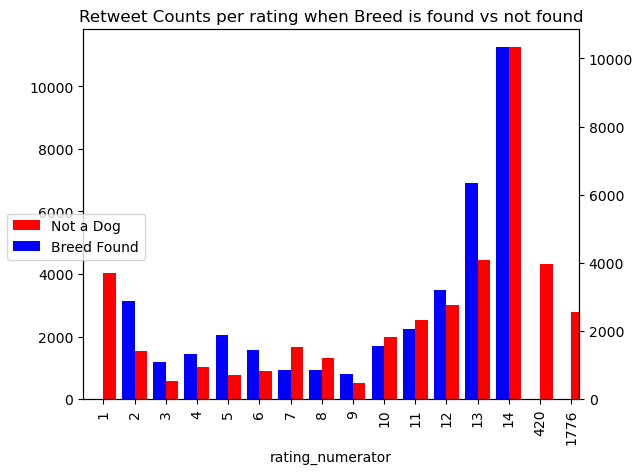

In [91]:
Breed = twitter_archive_master.query('Breed != "Not a Dog"')[['retweet_count', 'favorite_count', 'rating_numerator']]
Breed = Breed.groupby('rating_numerator').mean()
NotDog = twitter_archive_master.query('Breed == "Not a Dog"')[['retweet_count', 'favorite_count', 'rating_numerator']]
NotDog = NotDog.groupby('rating_numerator').mean()
BarsBplot = NotDog.merge(Breed, on='rating_numerator', how='left')

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

BarsBplot.retweet_count_x.plot(kind='bar', color='red', ax=ax, width=width, position=0, label='Not a Dog')
BarsBplot.retweet_count_y.plot(kind='bar', color='blue', ax=ax2, width=width, position=1, label='Breed Found')

fig.legend(['Not a Dog', 'Breed Found'], loc='center left')
plt.title('Retweet Counts per rating when Breed is found vs not found')
plt.show()

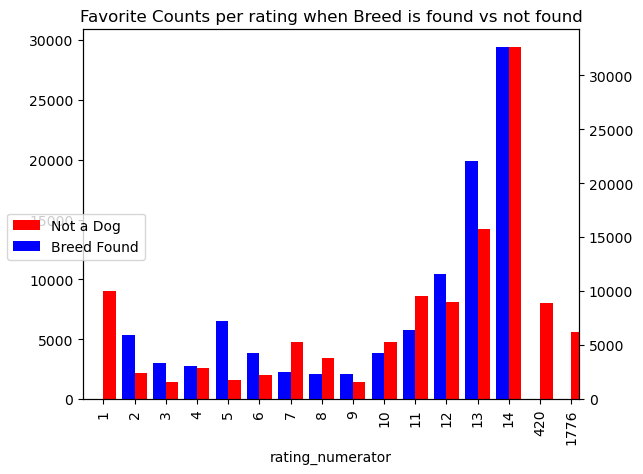

In [92]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

BarsBplot.favorite_count_x.plot(kind='bar', color='red', ax=ax, width=width, position=0, label='Not a Dog')
BarsBplot.favorite_count_y.plot(kind='bar', color='blue', ax=ax2, width=width, position=1, label='Breed Found')

fig.legend(['Not a Dog', 'Breed Found'], loc='center left')
plt.title('Favorite Counts per rating when Breed is found vs not found')
plt.show()

In [93]:
BarsBplot

,retweet_count_x,favorite_count_x,retweet_count_y,favorite_count_y
rating_numerator,,,,
1,4019.666667,8991.666667,NaN,NaN
2,1547.750000,2151.500000,2880.000000,5916.000000
3,573.375000,1448.500000,1086.400000,3384.200000
4,1034.750000,2592.750000,1338.000000,3053.500000
5,760.222222,1607.111111,1881.300000,7266.300000
6,909.833333,2025.916667,1443.900000,4245.000000
7,1677.538462,4750.000000,858.136364,2482.181818
8,1324.562500,3467.812500,843.541667,2358.479167
9,511.857143,1438.785714,750.638554,2298.650602


### Insight 4
Most Popular Rating given is a 10.  78.97% of all ratings given are 10 or better, and only 21.03% don't reach 10 potential.

In [284]:
(twitter_archive_master.query('rating_numerator>9').rating_numerator.value_counts())/twitter_archive_master.rating_numerator.count()

rating_numerator
10      0.235981
12      0.225078
11      0.194704
13      0.119159
14      0.013240
1776    0.000779
420     0.000779
Name: count, dtype: float64

In [285]:
(twitter_archive_master.query('rating_numerator<10').rating_numerator.value_counts())/twitter_archive_master.rating_numerator.count()

rating_numerator
9    0.075545
8    0.049844
7    0.027259
6    0.017134
5    0.014798
3    0.010125
4    0.009346
2    0.003894
1    0.002336
Name: count, dtype: float64

In [286]:
(twitter_archive_master.query('rating_numerator>9').rating_numerator.count())/twitter_archive_master.rating_numerator.count()

0.7897196261682243

In [287]:
(twitter_archive_master.query('rating_numerator<10').rating_numerator.count())/twitter_archive_master.rating_numerator.count()

0.2102803738317757

In [403]:
NotDogimagelist = twitter_archive_master.query('Breed == "Not a Dog"' ).sample(20)['jpg_url']
##Below was found on https://mindtrove.info/ and modified for the project. 

def gallery(images, row_height='auto'):
    """Shows a set of images in a gallery that flexes with the width of the notebook.
    
    Parameters
    ----------
    images: list of str or bytes
        URLs or bytes of images to display

    row_height: str
        CSS height value to assign to all images. Set to 'auto' by default to show images
        with their native dimensions. Set to a value like '250px' to make all rows
        in the gallery equal height.
    """
    figures = []
    for image in images:
        src = image
        
        figures.append(f'''
            <figure style="margin: 5px !important;">
              <img src="{src}" style="height: {row_height}">
              </figure>
        ''')
    return HTML(data=f'''
        <div style="display: flex; flex-flow: row wrap; text-align: center;">
        {''.join(figures)}
        </div>
    ''')
    
gallery(NotDogimagelist, row_height='150px')